<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/segmentacao_sugar_OUR_CODE_v_04_maio_19_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import cv2
import zipfile
import random


In [2]:
!pip install mahotas

In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
# img = img_as_float(astronaut()[::2, ::2])
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos_Grandes_3cdAmostra.zip'
Nome='Q6-1-4.jpg'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
img=cv2.imread(Nome)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
img=ww[0]

In [8]:
print(img.shape)

(1200, 1200)


In [0]:
a=0
b=1200
c=100
d=200
Num=25
ww=[]
label=[]

for i in range(Num):
  x=random.randint(a, b)
  y=random.randint(a, b)

  Width=random.randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


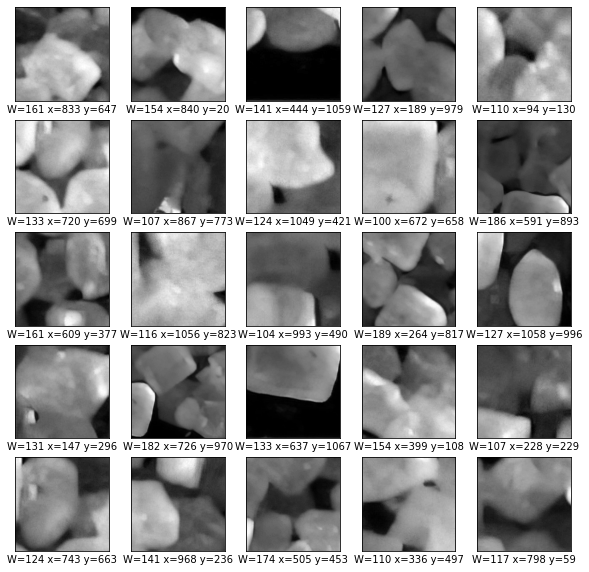

In [17]:
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


In [11]:
print(label)

['W=161 x=833 y=647', 'W=154 x=840 y=20', 'W=141 x=444 y=1059', 'W=127 x=189 y=979', 'W=110 x=94 y=130', 'W=133 x=720 y=699', 'W=107 x=867 y=773', 'W=124 x=1049 y=421', 'W=100 x=672 y=658', 'W=186 x=591 y=893', 'W=161 x=609 y=377', 'W=116 x=1056 y=823', 'W=104 x=993 y=490', 'W=189 x=264 y=817', 'W=127 x=1058 y=996', 'W=131 x=147 y=296', 'W=182 x=726 y=970', 'W=133 x=637 y=1067', 'W=154 x=399 y=108', 'W=107 x=228 y=229', 'W=124 x=743 y=663', 'W=141 x=968 y=236', 'W=174 x=505 y=453', 'W=110 x=336 y=497', 'W=117 x=798 y=59']


In [12]:
print('x=',x)
print('y=',y)
print('Width=',Width)

x= 798
y= 59
Width= 117


In [13]:
'''
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap=plt.cm.binary)
    plt.xlabel(img_name[i])
plt.show()
'''

'\nplt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(ww[i], cmap=plt.cm.binary)\n    plt.xlabel(img_name[i])\nplt.show()\n'